In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('eCom_cust_segmentation.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null object
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ MB


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,70864.000000,70864,70864,70864.000000,70864,70864.000000,70864.00000,70864
unique,NaN,3227,3352,NaN,13140,NaN,NaN,1
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,NaN,381,381,NaN,128,NaN,NaN,70864
mean,560639.843136,NaN,NaN,11.511233,NaN,3.063033,15552.19790,NaN
std,13176.494003,NaN,NaN,41.017582,NaN,31.894970,1595.50593,NaN
min,536365.000000,NaN,NaN,1.000000,NaN,0.001000,12747.00000,NaN
25%,549128.000000,NaN,NaN,2.000000,NaN,1.250000,14194.00000,NaN
50%,562012.500000,NaN,NaN,4.000000,NaN,1.950000,15525.00000,NaN
75%,572283.000000,NaN,NaN,12.000000,NaN,3.750000,16931.00000,NaN


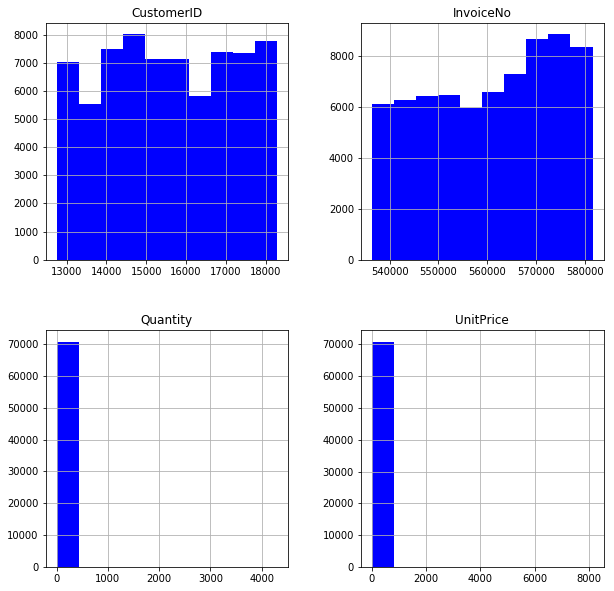

In [7]:
df.hist(figsize=(10,10), color='blue')
plt.show()

In [8]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

In [9]:
#df.Quantity.hist(bins=25)
df.Description.nunique()

3352

In [10]:
print(' Min Invoice Date:{}\n Max Invoice Date:{}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

 Min Invoice Date:2010-12-01 08:26:00
 Max Invoice Date:2011-12-09 12:49:00


In [11]:
### Converting object type to date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [13]:
# Define a function that will parse the date
#def get_day(x): return dt.datetime(x.year, x.month, x.day) 
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [14]:
# Get the date from date time. 
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month) 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01


In [15]:
df_grpby_custid_invmo=df.groupby('CustomerID')['InvoiceMonth']
#df_grpby_custid_invmo.apply(lambda _df: _df.sort_values(by=['CustomerID']))

In [16]:
df_grpby_custid_invmo.head(10)

416792   2011-10-01
482904   2011-11-01
263743   2011-07-01
495549   2011-11-01
204384   2011-05-01
125615   2011-03-01
483123   2011-11-01
449888   2011-11-01
127438   2011-03-01
189515   2011-05-01
181007   2011-05-01
439284   2011-11-01
198992   2011-05-01
223228   2011-06-01
355073   2011-09-01
348881   2011-09-01
419995   2011-10-01
309002   2011-08-01
270135   2011-07-01
321727   2011-09-01
232256   2011-06-01
116024   2011-03-01
300478   2011-08-01
95854    2011-02-01
401992   2011-10-01
3754     2010-12-01
294186   2011-08-01
14738    2010-12-01
514643   2011-11-01
46727    2011-01-01
            ...    
169024   2011-04-01
172513   2011-05-01
348226   2011-09-01
336431   2011-09-01
359243   2011-09-01
350277   2011-09-01
4760     2010-12-01
341632   2011-09-01
101117   2011-02-01
439241   2011-11-01
436338   2011-11-01
527491   2011-12-01
426020   2011-10-01
195611   2011-05-01
185854   2011-05-01
252083   2011-07-01
415211   2011-10-01
313968   2011-08-01
81046    2011-02-01


In [39]:
df['CohortMonth'] = df_grpby_custid_invmo.transform('min')

In [19]:
df['LastTxionDate']= df.groupby('CustomerID')['InvoiceDate'].transform(max)
df[df['CustomerID'] == 14286].sort_values(by='InvoiceDate')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,LastTxionDate
152102,549577,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-04-11 08:16:00,1.25,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152099,549577,22561,WOODEN SCHOOL COLOURING SET,12,2011-04-11 08:16:00,1.65,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152186,549577,21156,RETROSPOT CHILDRENS APRON,8,2011-04-11 08:16:00,1.95,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152105,549577,22390,PAPERWEIGHT CHILDHOOD MEMORIES,6,2011-04-11 08:16:00,2.55,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152134,549577,21786,POLKADOT RAIN HAT,24,2011-04-11 08:16:00,0.42,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152130,549577,51014C,"FEATHER PEN,COAL BLACK",12,2011-04-11 08:16:00,0.85,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152161,549577,22747,POPPY'S PLAYHOUSE BATHROOM,6,2011-04-11 08:16:00,2.10,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152064,549577,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-04-11 08:16:00,0.42,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152077,549577,21504,SKULLS GREETING CARD,12,2011-04-11 08:16:00,0.42,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00
152189,549577,85049G,CHOCOLATE BOX RIBBONS,12,2011-04-11 08:16:00,1.25,14286,United Kingdom,2011-04-01,2011-11-16 10:34:00


In [66]:
df.loc[(df.CustomerID == 16360) & (df.InvoiceNo == 577485)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
482836,577485,21975,PACK OF 60 DINOSAUR CAKE CASES,2,2011-11-20 11:56:00,0.55,16360,United Kingdom,2011-11-01,2011-09-01
482828,577485,23256,CHILDRENS CUTLERY SPACEBOY,1,2011-11-20 11:56:00,4.15,16360,United Kingdom,2011-11-01,2011-09-01
482939,577485,23300,GARDENERS KNEELING PAD CUP OF TEA,4,2011-11-20 11:56:00,1.65,16360,United Kingdom,2011-11-01,2011-09-01
482887,577485,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-11-20 11:56:00,1.65,16360,United Kingdom,2011-11-01,2011-09-01
482897,577485,20757,RED DAISY POCKET BOOK,2,2011-11-20 11:56:00,0.85,16360,United Kingdom,2011-11-01,2011-09-01
482912,577485,22563,HAPPY STENCIL CRAFT,2,2011-11-20 11:56:00,1.25,16360,United Kingdom,2011-11-01,2011-09-01
482962,577485,22550,HOLIDAY FUN LUDO,2,2011-11-20 11:56:00,3.75,16360,United Kingdom,2011-11-01,2011-09-01
482933,577485,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1,2011-11-20 11:56:00,4.25,16360,United Kingdom,2011-11-01,2011-09-01
482919,577485,22634,CHILDS BREAKFAST SET SPACEBOY,1,2011-11-20 11:56:00,9.95,16360,United Kingdom,2011-11-01,2011-09-01


In [61]:
df['Quantity'].value_counts()[0:10]

1     14329
2     11023
12     9974
6      6410
4      5673
3      5054
24     3896
10     3627
8      1916
5      1519
Name: Quantity, dtype: int64

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 10 columns):
InvoiceNo       70864 non-null int64
StockCode       70864 non-null object
Description     70864 non-null object
Quantity        70864 non-null int64
InvoiceDate     70864 non-null datetime64[ns]
UnitPrice       70864 non-null float64
CustomerID      70864 non-null int64
Country         70864 non-null object
InvoiceMonth    70864 non-null datetime64[ns]
CohortMonth     70864 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 8.4+ MB


In [74]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [75]:
invoice_yr, invoice_mo, invoice_day = get_date_int(df, 'InvoiceMonth')
cohort_yr, cohort_mo, cohort_day = get_date_int(df, 'CohortMonth')
year_diff = invoice_yr - cohort_yr
mo_diff = invoice_mo - cohort_mo
df['CohortIndex'] = (year_diff * 12) + mo_diff + 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [77]:
df.loc[(df['CustomerID'] == 14286)]
df.loc[df['CohortMonth'] == '2010-12-01'] and df.loc[''] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
152059,549577,22584,PACK OF 6 PANNETONE GIFT BOXES,6,2011-04-11 08:16:00,2.55,14286,United Kingdom,2011-04-01,2011-04-01,1
471736,576650,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,2011-11-16 10:34:00,1.95,14286,United Kingdom,2011-11-01,2011-04-01,8
152106,549577,22391,PAPERWEIGHT HOME SWEET HOME,6,2011-04-11 08:16:00,2.55,14286,United Kingdom,2011-04-01,2011-04-01,1
416772,572558,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-10-25 08:26:00,4.95,14286,United Kingdom,2011-10-01,2011-04-01,7
416793,572558,22991,GIRAFFE WOODEN RULER,12,2011-10-25 08:26:00,1.95,14286,United Kingdom,2011-10-01,2011-04-01,7
471789,576650,23194,GYMKHANA TREASURE BOOK BOX,8,2011-11-16 10:34:00,2.25,14286,United Kingdom,2011-11-01,2011-04-01,8
152182,549577,21990,MODERN FLORAL STATIONERY SET,6,2011-04-11 08:16:00,2.95,14286,United Kingdom,2011-04-01,2011-04-01,1
152108,549577,22536,MAGIC DRAWING SLATE PURDEY,24,2011-04-11 08:16:00,0.42,14286,United Kingdom,2011-04-01,2011-04-01,1
416761,572558,22029,SPACEBOY BIRTHDAY CARD,12,2011-10-25 08:26:00,0.42,14286,United Kingdom,2011-10-01,2011-04-01,7


In [86]:
new_group = df.groupby(['CohortMonth', 'CohortIndex'])
new_group.apply(lambda _df: _df.sort_values(by=['CohortIndex']))

InvoiceNo StockCode  \
CohortMonth CohortIndex                               
2010-12-01  1           3754       536673     21803   
                        3299       536618     22909   
                        26064      538473     21165   
                        34671      539418     21245   
                        25254      538363     21942   
                        38651      539593     22725   
                        39401      539642     21673   
                        28421      538637     22973   
                        17754      537773     22411   
                        23188      538184     21481   
                        20585      538067     22910   
                        18212      537806     22457   
                        10013      537224    79190D   
                        42415      539988    82613C   
                        41514      539859     21187   
                        23967      538296    84970S   
                        39410      539642     22489   
                        13060      537418     20819   
                        7838       537057     22197   
                        26389      538510     20977   
                        14739      537614     22866   
                        9650       537209     37461   
                        38322      539501     21169   
                        27982      538593     10002   
                        29026      538688     22411   
                        17908      537781     22818   
                        9553       537207     20979   
                        4294       536759     84683   
                        25945      538421     22746   
                        23303      538197     22563   
...                                   ...       ...   
2011-12-01  1           536866     581221     23211   
                        517847     580094     23394   
                        526848     580678     22647   
                        527058     580691    90214I   
                        517311     580050     22093   
                        532735     580996     17003   
                        519826     580173     22699   
                        523229     580504    84029G   
                        522970     580490     23434   
                        534497     581149     22107   
                        522697     580432     22644   
                        529497     580731     22529   
                        530406     580865     22113   
                        530145     580819     21365   
                        530033     580772     21136   
                        533955     581125     23207   
                        527041     580691     22299   
                        523270     580504     23349   
                        520596     580291     23344   
                        517318     580050     21535   
                        534283     581142     22533   
                        533947     581125     22992   
                        537271     581241     21770   
                        531023     580901    72799C   
                        523276     580504     21015   
                        533952     581125     22150   
                        532945     581002     22711   
                        533938     581125     22616   
                        526347     580663     23320   
                        532738     580996     21481   

                                                        Description  Quantity  \
CohortMonth CohortIndex                                                         
2010-12-01  1           3754         CHRISTMAS TREE STAR DECORATION        36   
                        3299    SET OF 20 VINTAGE CHRISTMAS NAPKINS        36   
                        26064         BEWARE OF THE CAT METAL SIGN          4   
                        34671                 GREEN POLKADOT PLATE          8   
                        25254                 SKULLS DESIGN FLANNEL        12   

In [164]:
cohort_data = new_group['CustomerID'].apply(pd.Series.nunique)
cohort_data.head(10)

CohortMonth  CohortIndex
2010-12-01   1              716
             2              246
             3              221
             4              251
             5              245
             6              285
             7              249
             8              236
             9              240
             10             265
Name: CustomerID, dtype: int64

In [165]:
cohort_data = cohort_data.reset_index()
cohort_data.head(10)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
5,2010-12-01,6,285
6,2010-12-01,7,249
7,2010-12-01,8,236
8,2010-12-01,9,240
9,2010-12-01,10,265


In [166]:
cohort_counts = cohort_data.pivot(index='CohortMonth', columns ='CohortIndex', values ='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
cohort_base = cohort_counts.iloc[:,0]
cohort_base

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64

In [175]:
retention = cohort_counts.divide(cohort_base, axis = 0)
retention.round(1) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,30.0,30.0,40.0,30.0,40.0,30.0,30.0,30.0,40.0,40.0,50.0,20.0
2011-01-01,100.0,20.0,20.0,20.0,30.0,30.0,20.0,30.0,30.0,30.0,40.0,10.0,NaN
2011-02-01,100.0,20.0,20.0,30.0,30.0,20.0,30.0,30.0,30.0,30.0,10.0,NaN,NaN
2011-03-01,100.0,20.0,30.0,20.0,20.0,20.0,30.0,20.0,30.0,10.0,NaN,NaN,NaN
2011-04-01,100.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,10.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,20.0,20.0,10.0,20.0,20.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.0,10.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.0,20.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


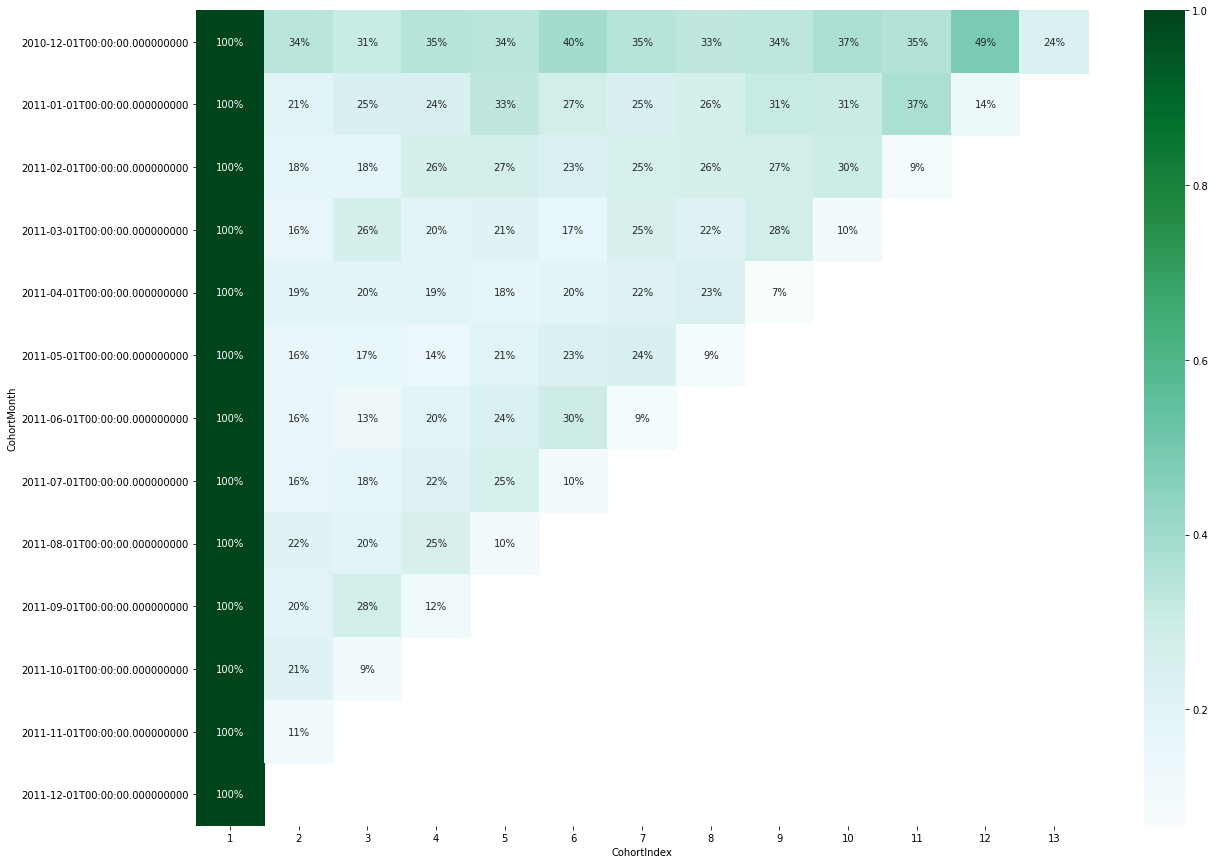

In [176]:
plt.figure(figsize =(20,15))
retention_hm = sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='BuGn')
plt.title('Retention graph')
plt.show()

In [177]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [234]:
snapshot_dt = df['InvoiceDate'].max() + dt.timedelta(1)
snapshot_dt

Timestamp('2011-12-10 12:49:00')

In [235]:
rfm_data = df.groupby(['CustomerID']).agg(
    {
        'InvoiceDate':lambda x:(snapshot_dt - x.max()).days,
        'InvoiceNo': 'count',
        'UnitPrice':'sum'
    }
)

In [236]:
rfm_data.head()

,InvoiceDate,InvoiceNo,UnitPrice
CustomerID,,,
12747,2,27,126.26
12748,1,967,3098.10
12749,4,37,161.75
12820,3,17,33.57
12822,71,9,24.16


In [237]:
rfm_data.rename(columns = 
                {
                    'InvoiceDate':'Recency',
                    'InvoiceNo': 'Frequency',
                    'UnitPrice': 'Monetary'
                },inplace=True
               )
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,126.26
12748,1,967,3098.10
12749,4,37,161.75
12820,3,17,33.57
12822,71,9,24.16


In [238]:
r_quart = pd.qcut(rfm_data['Recency'], 4, labels =range(4,0,-1))
rfm_data['R'] = r_quart
rfm_data.head()

,Recency,Frequency,Monetary,R
CustomerID,,,,
12747,2,27,126.26,4
12748,1,967,3098.10,4
12749,4,37,161.75,4
12820,3,17,33.57,4
12822,71,9,24.16,2


In [239]:
f_quart = pd.qcut(rfm_data['Frequency'], 4, labels=range(1,5,1))
m_quart = pd.qcut(rfm_data['Monetary'], 4, labels=range(1,5,1))
rfm_data['F'] = f_quart
rfm_data['M'] = m_quart
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747,2,27,126.26,4,4,4
12748,1,967,3098.10,4,4,4
12749,4,37,161.75,4,4,4
12820,3,17,33.57,4,3,3
12822,71,9,24.16,2,2,2


In [240]:
rfm_data['RFM_Score'] = rfm_data[['R','F','M']].sum(axis=1)
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12747,2,27,126.26,4,4,4,12.0
12748,1,967,3098.10,4,4,4,12.0
12749,4,37,161.75,4,4,4,12.0
12820,3,17,33.57,4,3,3,10.0
12822,71,9,24.16,2,2,2,6.0


In [241]:
def rfm_segment(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm_data['RFM_Segment'] = rfm_data.apply(rfm_segment, axis=1)
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444
12748,1,967,3098.10,4,4,4,12.0,444
12749,4,37,161.75,4,4,4,12.0,444
12820,3,17,33.57,4,3,3,10.0,433
12822,71,9,24.16,2,2,2,6.0,222


In [242]:
rfm_data.groupby('RFM_Segment').size().sort_values(ascending=False)[0:10]

RFM_Segment
444    419
111    365
344    212
211    204
433    169
233    166
333    154
222    151
311    137
112    135
dtype: int64

In [243]:
rfm_data[rfm_data['RFM_Segment']=='111'][0:5]

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
12823,297,1,7.65,1,1,1,3.0,111
12837,173,2,8.60,1,1,1,3.0,111
12852,295,2,7.90,1,1,1,3.0,111
12873,282,1,2.55,1,1,1,3.0,111
12922,161,4,4.54,1,1,1,3.0,111


In [244]:
rfm_data[rfm_data['RFM_Segment'] == '444'][0:5]

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444
12748,1,967,3098.10,4,4,4,12.0,444
12749,4,37,161.75,4,4,4,12.0,444
12839,3,59,85.15,4,4,4,12.0,444
12841,5,78,177.46,4,4,4,12.0,444


In [246]:
rfm_data.groupby('RFM_Score').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':['mean','count']
    }
).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         254.3       2.0      4.3   365
4.0         164.3       2.7      8.6   369
5.0         128.7       4.3     12.2   401
6.0         103.7       5.7     21.4   430
7.0          94.3       9.3     26.6   345
8.0          65.8      11.8     35.7   372
9.0          56.5      16.6     50.9   334
10.0         34.6      23.1     67.3   360
11.0         25.3      39.3    137.0   306
12.0          7.9      75.1    221.0   419

In [247]:
def segment_me(df):
    if df['RFM_Score'] > 9:
        return 'Platinum'
    elif df['RFM_Score'] > 6 and df['RFM_Score'] < 10:
        return 'Gold'
    elif df['RFM_Score'] > 3 and df['RFM_Score'] < 7:
        return 'Silver'
    else:
        return 'Regular'

In [248]:
rfm_data['General_Segment'] = rfm_data.apply(segment_me, axis=1)
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment,General_Segment
CustomerID,,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444,Platinum
12748,1,967,3098.10,4,4,4,12.0,444,Platinum
12749,4,37,161.75,4,4,4,12.0,444,Platinum
12820,3,17,33.57,4,3,3,10.0,433,Platinum
12822,71,9,24.16,2,2,2,6.0,222,Silver


In [251]:
rfm_data.groupby('General_Segment').agg(
    {
        'Recency':['mean', 'count'],
        'Frequency':['mean', 'count'],
        'Monetary': ['mean', 'count']
    }
).round(1)

Recency       Frequency       Monetary      
                   mean count      mean count     mean count
General_Segment                                             
Gold               72.2  1051      12.5  1051     37.6  1051
Platinum           21.7  1085      47.8  1085    146.3  1085
Regular           254.3   365       2.0   365      4.3   365
Silver            130.7  1200       4.3  1200     14.4  1200

In [252]:
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment,General_Segment
CustomerID,,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444,Platinum
12748,1,967,3098.10,4,4,4,12.0,444,Platinum
12749,4,37,161.75,4,4,4,12.0,444,Platinum
12820,3,17,33.57,4,3,3,10.0,433,Platinum
12822,71,9,24.16,2,2,2,6.0,222,Silver


In [253]:
rfm_data[rfm_data['RFM_Score'] == 9].mean()

Recency        56.482036
Frequency      16.619760
Monetary       50.895120
R               2.847305
F               3.068862
M               3.083832
RFM_Score       9.000000
RFM_Segment          inf
dtype: float64

In [254]:
rfm_data[rfm_data['RFM_Score'] == 9][:10]

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment,General_Segment
CustomerID,,,,,,,,,
12843,160,22,80.70,1,4,4,9.0,144,Gold
12849,31,15,44.90,3,3,3,9.0,333,Gold
12853,135,12,60.93,2,3,4,9.0,234,Gold
12883,25,10,51.13,3,3,3,9.0,333,Gold
12885,63,20,65.69,2,3,4,9.0,234,Gold
12909,88,19,217.36,2,3,4,9.0,234,Gold
12925,5,11,14.36,4,3,2,9.0,432,Gold
12928,35,15,30.69,3,3,3,9.0,333,Gold
12931,22,19,36.39,3,3,3,9.0,333,Gold


In [255]:
groupby_rfm_score = rfm_data.groupby('RFM_Score').mean()
groupby_rfm_score.head(10)

,Recency,Frequency,Monetary
RFM_Score,,,
3.0,254.260274,1.997260,4.303507
4.0,164.292683,2.653117,8.642954
5.0,128.745636,4.259352,12.168030
6.0,103.662791,5.734884,21.439953
7.0,94.255072,9.333333,26.634377
8.0,65.830645,11.833333,35.692341
9.0,56.482036,16.619760,50.895120
10.0,34.561111,23.091667,67.299028
11.0,25.330065,39.307190,136.980915


In [257]:
rfm_data.groupby('RFM_Score').agg(
    {
        'Monetary':'sum'
    }
)

,Monetary
RFM_Score,
3.0,1570.780
4.0,3189.250
5.0,4879.380
6.0,9219.180
7.0,9188.860
8.0,13277.551
9.0,16998.970
10.0,24227.650
11.0,41916.160


In [229]:
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment
CustomerID,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444
12748,1,967,3098.10,4,4,4,12.0,444
12749,4,37,161.75,4,4,4,12.0,444
12820,3,17,33.57,4,3,3,10.0,433
12822,71,9,24.16,2,2,2,6.0,222


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


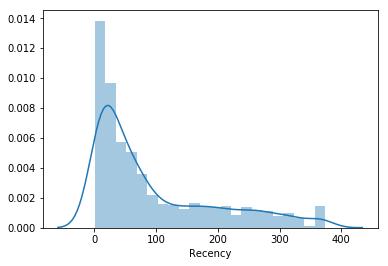

In [197]:
import seaborn as sns
rfm_data.head()
sns.distplot(rfm_data['Recency'])
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


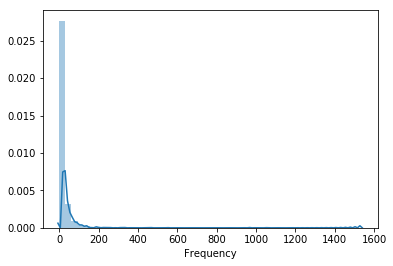

In [199]:
sns.distplot(rfm_data['Frequency'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


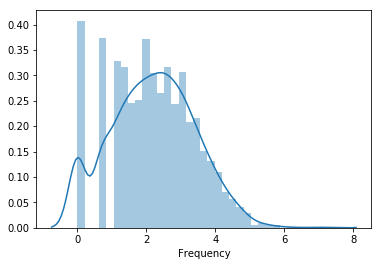

In [201]:
import numpy as np
freq_np = np.log(rfm_data['Frequency'])
sns.distplot(freq_np)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


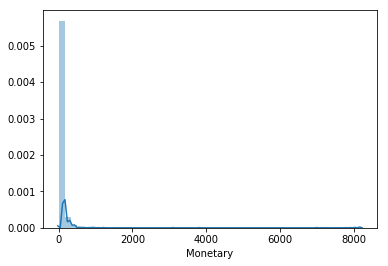

In [200]:
sns.distplot(rfm_data['Monetary'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


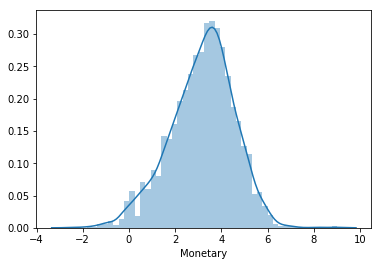

In [202]:
monetary_log = np.log(rfm_data['Monetary'])
sns.distplot(monetary_log)

In [263]:
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Segment,General_Segment
CustomerID,,,,,,,,,
12747,2,27,126.26,4,4,4,12.0,444,Platinum
12748,1,967,3098.10,4,4,4,12.0,444,Platinum
12749,4,37,161.75,4,4,4,12.0,444,Platinum
12820,3,17,33.57,4,3,3,10.0,433,Platinum
12822,71,9,24.16,2,2,2,6.0,222,Silver


In [264]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3701 entries, 12747 to 18287
Data columns (total 9 columns):
Recency            3701 non-null int64
Frequency          3701 non-null int64
Monetary           3701 non-null float64
R                  3701 non-null category
F                  3701 non-null category
M                  3701 non-null category
RFM_Score          3701 non-null float64
RFM_Segment        3701 non-null object
General_Segment    3701 non-null object
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 373.5+ KB


In [262]:
rfm_data.describe()

,Recency,Frequency,Monetary,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,58.648682,7.443123
std,99.974969,44.831615,210.647682,2.884595
min,1.000000,1.000000,0.080000,3.000000
25%,19.000000,4.000000,9.950000,5.000000
50%,52.000000,9.000000,27.230000,7.000000
75%,151.000000,21.000000,59.990000,10.000000
max,374.000000,1532.000000,8209.550000,12.000000


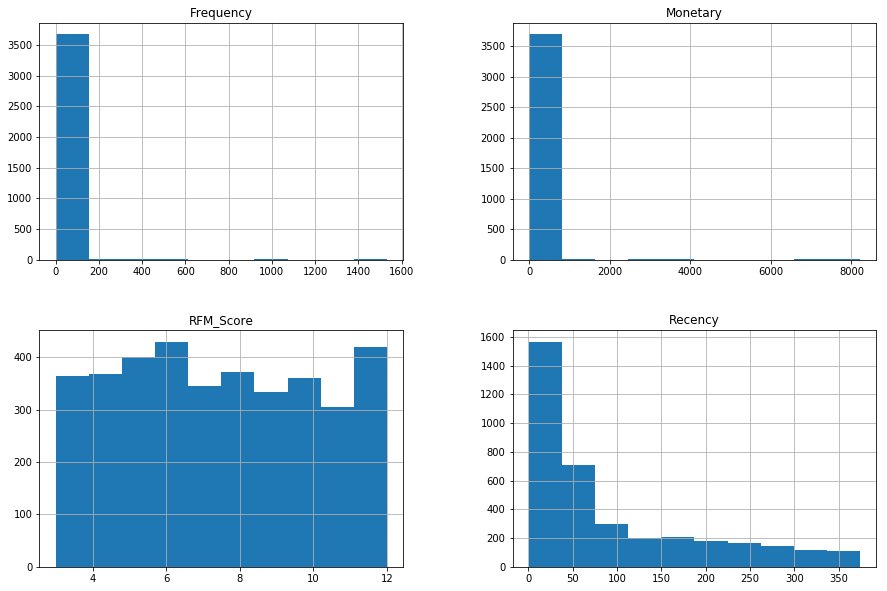

In [208]:
rfm_data.hist(figsize=(15,10))
plt.show()

In [301]:
rfm_data_n = rfm_data.copy()
rfm_data_n = rfm_data_n.drop(columns=['R','F','M','RFM_Score','RFM_Segment','General_Segment'])
rfm_data_n.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,126.26
12748,1,967,3098.10
12749,4,37,161.75
12820,3,17,33.57
12822,71,9,24.16


In [272]:
import numpy as np
rfm_data_log = np.log(rfm_data_n)
rfm_data_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,0.693147,3.295837,4.838343
12748,0.000000,6.874198,8.038544
12749,1.386294,3.610918,5.086052
12820,1.098612,2.833213,3.513633
12822,4.262680,2.197225,3.184698


In [280]:
### Standardize the values - It creates a numpy array from Pandas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_data_log)
rfm_data_norm = scaler.transform(rfm_data_log)
rfm_data_norm

array([[-2.19564198,  0.90952097,  1.20248146],
       [-2.68455336,  3.84505048,  3.50096957],
       [-1.7067306 ,  1.16799951,  1.38039385],
       ...,
       [-1.21781921, -1.22561047, -0.96212305],
       [-1.7067306 ,  2.3271315 ,  1.65938632],
       [-0.03159076,  0.4273268 , -0.24445969]])

In [281]:
print('Mean: ', rfm_data_norm.mean(axis=0))
#print('Standard deviation',rfm_data_norm.std(axis=0))

Mean:  [ 1.85267155e-16  1.31510882e-16 -9.43134609e-17]


In [282]:
df_rfm_data_norm = pd.DataFrame(rfm_data_norm, index=rfm_data_log.index, columns=rfm_data_log.columns)
df_rfm_data_norm.describe().round(5)

,Recency,Frequency,Monetary
count,3701.00000,3701.00000,3701.00000
mean,0.00000,0.00000,-0.00000
std,1.00014,1.00014,1.00014
min,-2.68455,-1.79424,-4.08663
25%,-0.60769,-0.65698,-0.62238
50%,0.10246,0.00827,0.10070
75%,0.85439,0.70335,0.66800
max,1.49412,4.22252,4.20089


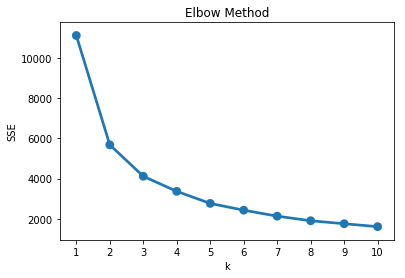

In [290]:
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 1)
    # Fit KMeans on the normalized dataset
    kmeans.fit(df_rfm_data_norm)
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

##Plot the title
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [291]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_rfm_data_norm)
cluster_labels = kmeans.labels_

In [287]:
rfm_data_clusters = rfm_data.assign(Cluster=cluster_labels)
rfm_data_clusters.groupby(['Cluster']).agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':['mean','count']
    }
)

Recency  Frequency    Monetary      
               mean       mean        mean count
Cluster                                         
0         37.642135  34.731461  106.460753  1780
1        146.796460   4.706923   14.345981  1921

In [292]:
rfm_data_3clusters = rfm_data.assign(Cluster=cluster_labels)
rfm_data_3clusters.groupby(['Cluster']).agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':['mean', 'count']
    }
)

Recency  Frequency    Monetary      
               mean       mean        mean count
Cluster                                         
0         16.081532  48.522593  148.716306  1018
1        155.911193   2.530990    6.454588  1081
2        102.426966  11.692884   36.634308  1602

In [295]:
df_rfm_data_norm['Cluster'] = rfm_data_3clusters['Cluster']
df_rfm_data_norm[df_rfm_data_norm['Cluster'] ==1].head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12823,1.331521,-1.794238,-0.811182,1
12827,-0.218292,-1.225610,-0.626001,1
12837,0.950321,-1.225610,-0.727108,1
12845,1.261676,-0.656983,-0.390058,1
12852,1.326755,-1.225610,-0.788086,1


In [313]:
rfm_data_melt = pd.melt(df_rfm_data_norm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency','Frequency','Monetary'],
                        var_name='Attribute',
                        value_name='Value'
                       )
rfm_data_melt

,CustomerID,Cluster,Attribute,Value
0,12747,0,Recency,-2.195642
1,12748,0,Recency,-2.684553
2,12749,0,Recency,-1.706731
3,12820,0,Recency,-1.909647
4,12822,2,Recency,0.322128
5,12823,1,Recency,1.331521
6,12824,2,Recency,0.203393
7,12826,0,Recency,-1.909647
8,12827,1,Recency,-0.218292
9,12828,0,Recency,-1.217819


In [325]:
%%bash
pip freeze | grep seaborn

seaborn==0.9.0


In [299]:
cluster_avg = rfm_data_3clusters.groupby(['Cluster']).mean()
population_avg = rfm_data_n.mean()
relative_imp = (cluster_avg/ population_avg) - 1
relative_imp

,Frequency,Monetary,RFM_Score,Recency
Cluster,,,,
0,1.534180,1.535714,NaN,-0.829462
1,-0.867814,-0.889945,NaN,0.653378
2,-0.389318,-0.375360,NaN,0.086199


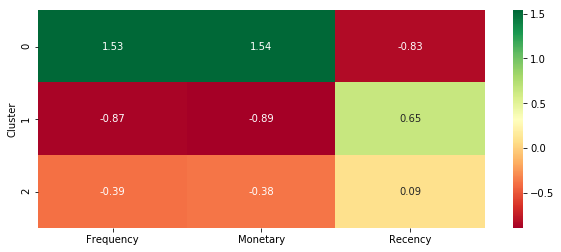

In [310]:
plt.figure(figsize=(10,4))
plt.tile('Relative importance of attributes')
sns.heatmap(data=relative_imp, fmt='0.2f', annot=True, cmap='RdYlGn')
plt.show()